# Outlier Data Detection 
---

## Using STD

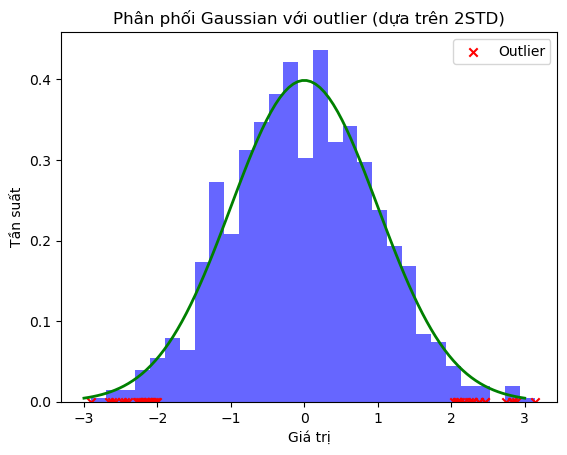

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các tham số của phân phối Gaussian
mean = 0  # Giá trị trung bình
std_deviation = 1  # Độ lệch chuẩn

# Tạo một dãy giá trị mẫu từ phân phối Gaussian
num_samples = 1000  # Số lượng mẫu
samples = np.random.normal(mean, std_deviation, num_samples)

# Xác định outlier dựa trên 2STD
threshold = 2 * std_deviation
outliers = np.abs(samples - mean) > threshold

# Vẽ biểu đồ histogram của mẫu
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Đánh dấu outlier bằng màu đỏ trên biểu đồ
plt.scatter(samples[outliers], np.zeros_like(samples[outliers]), color='r', marker='x', label='Outlier')

# Vẽ đường cong phân phối Gaussian xấp xỉ
x = np.linspace(-3, 3, 100)
pdf = (1 / (std_deviation * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_deviation) ** 2)
plt.plot(x, pdf, 'g', linewidth=2)

# Đặt tiêu đề và nhãn trục
plt.title('Phân phối Gaussian với outlier (dựa trên 2STD)')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.legend()
plt.show()


## Using IQR


<img src='image.png' width=800/>

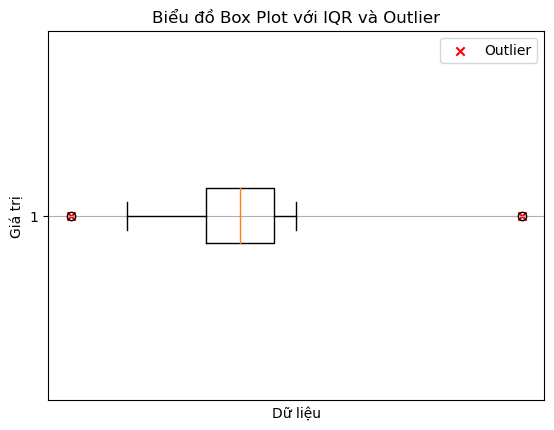

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa dãy dữ liệu mẫu (có outlier)
data = [10, 15, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 50]

# Sắp xếp dãy dữ liệu
data.sort()

# Tính Q1 và Q3 (phân vị 25% và 75%)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Tính IQR
IQR = Q3 - Q1

# Xác định outlier dựa trên IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in data if x < lower_bound or x > upper_bound]

# Vẽ biểu đồ box plot để trực quan hóa IQR và outlier
plt.boxplot(data, vert=False)
plt.title('Biểu đồ Box Plot với IQR và Outlier')
plt.xlabel('Dữ liệu')
plt.xticks([])  # Ẩn nhãn trục x
plt.ylabel('Giá trị')
plt.grid()

# Đánh dấu các outlier bằng màu đỏ
plt.scatter(outliers, [1] * len(outliers), color='r', marker='x', label='Outlier')
plt.legend()

# Hiển thị biểu đồ
plt.show()


## LOF

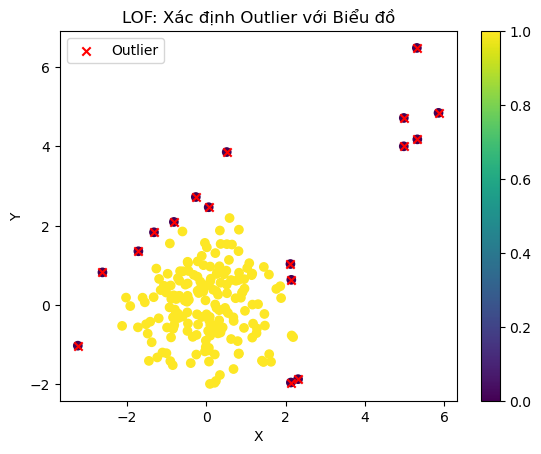

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Tạo dữ liệu mẫu (bao gồm outlier)
np.random.seed(42)
data = np.random.randn(200, 2)
data[175:180] += 5  # Tạo các outlier

# Xác định LOF scores
lof = LocalOutlierFactor(n_neighbors=20)  # Số lượng láng giềng được sử dụng
lof_scores = lof.fit_predict(data)

# Đánh dấu outlier bằng màu đỏ
outliers = data[lof_scores == -1]

# Vẽ biểu đồ dữ liệu và đánh dấu outlier
plt.scatter(data[:, 0], data[:, 1], c=lof_scores, cmap='viridis')
plt.scatter(outliers[:, 0], outliers[:, 1], marker='x', color='red', label='Outlier')
plt.colorbar()
plt.title('LOF: Xác định Outlier với Biểu đồ')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
